In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_excel
dataframe=pd.read_csv('/content/drive/MyDrive/nlp bio informatics/final_rediology_data.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataframe.columns

Index(['image_name', 'image_caption', 'fulltext', 'label'], dtype='object')

In [ ]:
# del dataframe["poems"]
# del dataframe["Unnamed: 0"]

In [ ]:
dataframe.describe()

,image_name,image_caption,fulltext,label
count,3851,3850,3927,3955
unique,3851,696,3159,2
top,"CXR1864_IM-0558-3001.png,CXR1864_IM-0558-1001.png",Xray Chest PA and Lateral,The heart and lungs have in the interval. Bo...,abnormal
freq,1,1218,53,2564


In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
dataframe.drop_duplicates(inplace=True)

In [ ]:
dataframe['label'].value_counts()

label
abnormal    2471
normal      1354
Name: count, dtype: int64

In [ ]:
dataframe.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,image_name,image_caption,fulltext,label
0,"CXR3676_IM-1829-0001-0001.png,CXR3676_IM-1829-...",Xray Chest PA and Lateral,The cardiomediastinal silhouette appears irreg...,abnormal
1,"CXR3686_IM-1837-0001-0001.png,CXR3686_IM-1837-...","PA and lateral chest, XXXX, XXXX XXXX XXXX",Stable cardiomegaly. Improved aeration in the ...,abnormal
2,CXR3684_IM-1836-1001.png,Chest PA and lateral,2 views of the chest demonstrate sternotomy a...,abnormal
3,"CXR3670_IM-1826-1001.png,CXR3670_IM-1826-2001.png",Xray Chest PA and Lateral,"The heart, pulmonary and mediastinum are with...",abnormal
4,"CXR3672_IM-1828-2001.png,CXR3672_IM-1828-1001.png",PA and lateral chest dated XXXX,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...,...,...
3950,"CXR1882_IM-0571-1002.png,CXR1882_IM-0571-1001.png",Chest radiograph PA and lateral XXXX/XXXX at X...,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,"CXR1842_IM-0545-1001.png,CXR1842_IM-0545-1002.png","PA and lateral chest XXXX, XXXX at XXXX compar...",Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,"CXR1847_IM-0550-2001.png,CXR1847_IM-0550-1001.png","PA lateral chest radiograph, XXXX XXXX hours.",The cardiac and mediastinal silhouettes are un...,abnormal
3953,"CXR1877_IM-0568-1001.png,CXR1877_IM-0568-2001.png","PA and lateral chest XXXX, XXXX at XXXX compa...",Heart size normal. Lungs are clear. are norma...,normal


In [ ]:
dataframe.head()

,image_name,image_caption,fulltext,label
0,"CXR3676_IM-1829-0001-0001.png,CXR3676_IM-1829-...",Xray Chest PA and Lateral,The cardiomediastinal silhouette appears irreg...,abnormal
1,"CXR3686_IM-1837-0001-0001.png,CXR3686_IM-1837-...","PA and lateral chest, XXXX, XXXX XXXX XXXX",Stable cardiomegaly. Improved aeration in the ...,abnormal
2,CXR3684_IM-1836-1001.png,Chest PA and lateral,2 views of the chest demonstrate sternotomy a...,abnormal
3,"CXR3670_IM-1826-1001.png,CXR3670_IM-1826-2001.png",Xray Chest PA and Lateral,"The heart, pulmonary and mediastinum are with...",abnormal
4,"CXR3672_IM-1828-2001.png,CXR3672_IM-1828-1001.png",PA and lateral chest dated XXXX,Stable appearance of aortic valve prosthesis. ...,abnormal


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50 In Whole Dataset')

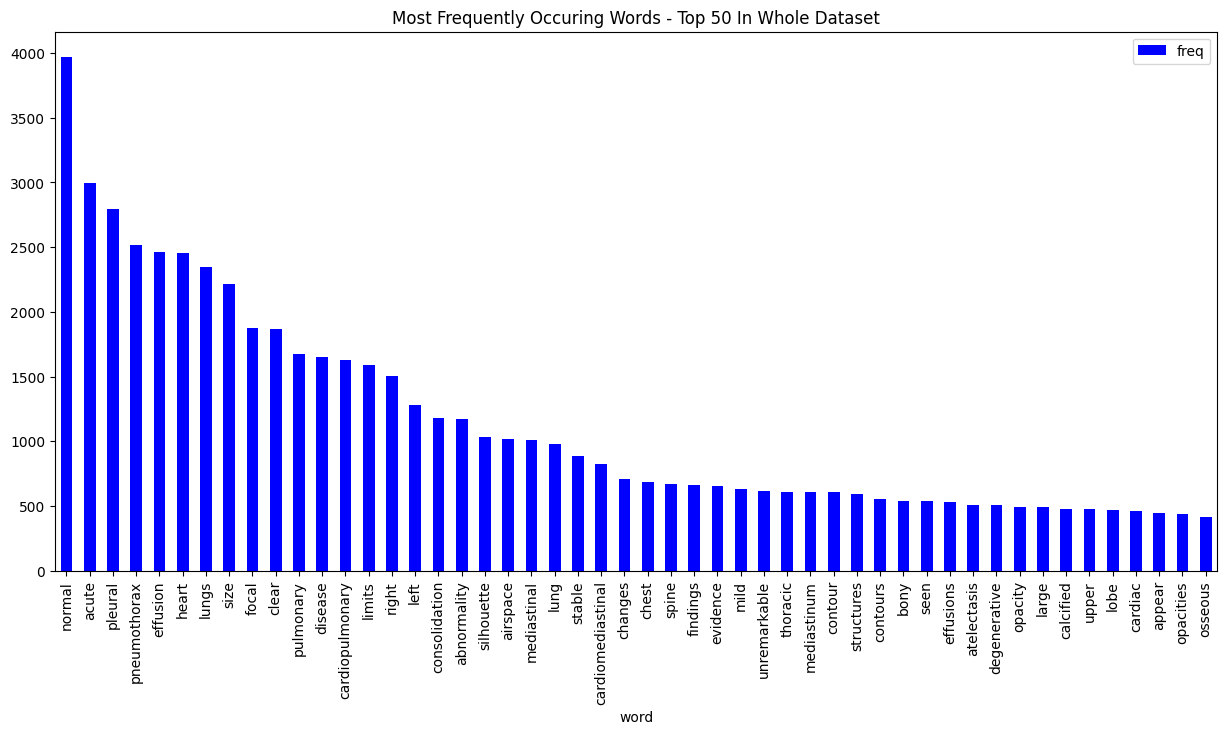

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataframe.fulltext)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 50 In Whole Dataset")

Text(0.5, 1.0, 'WordCloud - from Whole Dataset')

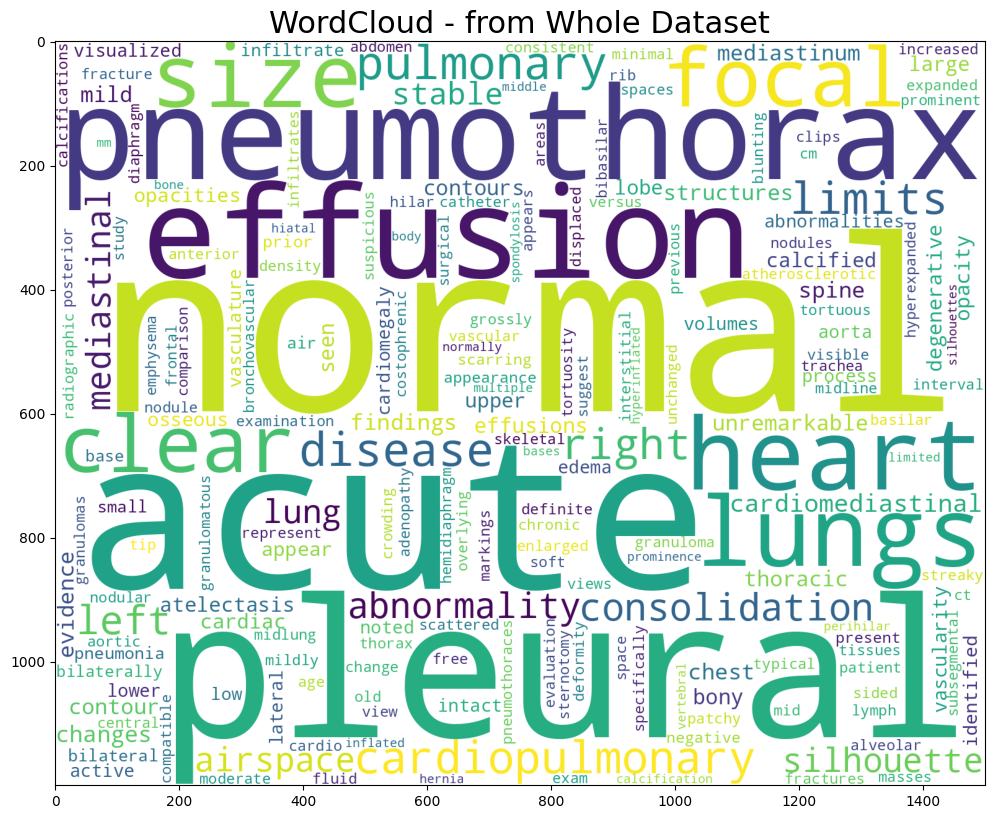

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title("WordCloud - from Whole Dataset", fontsize = 22)

In [ ]:
features = dataframe.iloc[:, 2].values
labels = dataframe.iloc[:, -1].values

In [ ]:
features

array(["The cardiomediastinal silhouette appears irregular secondary to the diffuse bilateral pulmonary interstitial disease. The thoracic aorta is tortuous. Calcified lymph  are demonstrated in the left hilum. No focal pulmonary consolidation. Diffuse increased bilateral pulmonary interstitial markings, consistent with the patient's history of known pulmonary fibrosis, with relative sparing of the bilateral lung apices. No pneumothorax or pleural effusion demonstrated. The thoracic spine appears intact.1. Redemonstration of diffuse bilateral pulmonary fibrosis with relative sparing of the bilateral lung apices. No focal pulmonary consolidation. .",
       'Stable cardiomegaly. Improved aeration in the left lung base. Right basilar airspace disease is unchanged. No pneumothorax or pleural effusion. Right internal jugular central line has been removed. Left subclavian line is stable.',
       '2 views of the chest demonstrate sternotomy  and mild thoracic dextroscoliosis. Incidental not

In [ ]:
labels

array(['abnormal', 'abnormal', 'abnormal', ..., 'abnormal', 'normal',
       'abnormal'], dtype=object)

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
processed_features

['the cardiomediastinal silhouette appears irregular secondary to the diffuse bilateral pulmonary interstitial disease the thoracic aorta is tortuous calcified lymph are demonstrated in the left hilum no focal pulmonary consolidation diffuse increased bilateral pulmonary interstitial markings consistent with the patient history of known pulmonary fibrosis with relative sparing of the bilateral lung apices no pneumothorax or pleural effusion demonstrated the thoracic spine appears intact 1 redemonstration of diffuse bilateral pulmonary fibrosis with relative sparing of the bilateral lung apices no focal pulmonary consolidation ',
 'stable cardiomegaly improved aeration in the left lung base right basilar airspace disease is unchanged no pneumothorax or pleural effusion right internal jugular central line has been removed left subclavian line is stable ',
 '2 views of the chest demonstrate sternotomy and mild thoracic dextroscoliosis incidental note of an azygos pseudofissure the heart i

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# def evaluate_model(X_train, y_train, model):
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
#     diff = scores.mean() - model.score(X_test, y_test)
#     SD = diff / scores.std()

#     print(confusion_matrix(y_test,preds))
#     print(classification_report(y_test,preds))
#     print(accuracy_score(y_test, preds))
#     print(f"Training Score:{model.score(X_train, y_train)}")
#     print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
#     print(f"Testing Score: {model.score(X_test, y_test)}")
#     print(f"Cross & Test Diff: {diff}")
#     print(f"Standard Deviations Away: {SD}")
#     print(confusion_matrix(y_test, preds))

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, stratify=labels, random_state=2)
# clf = LogisticRegression(random_state=0, solver='newton-cg', max_iter=1000)

In [ ]:
# evaluate_model(X_train, y_train, clf)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
print(len(y_test))

765


In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df=pd.DataFrame()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier.fit(X_train_res, y_train_res)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
predictions

array(['abnormal', 'abnormal', 'abnormal', 'abnormal', 'normal', 'normal',
       'abnormal', 'normal', 'abnormal', 'abnormal', 'abnormal',
       'abnormal', 'normal', 'abnormal', 'normal', 'abnormal', 'normal',
       'abnormal', 'abnormal', 'normal', 'abnormal', 'normal', 'normal',
       'normal', 'abnormal', 'normal', 'abnormal', 'abnormal', 'abnormal',
       'abnormal', 'normal', 'abnormal', 'normal', 'abnormal', 'abnormal',
       'normal', 'normal', 'abnormal', 'abnormal', 'abnormal', 'abnormal',
       'normal', 'normal', 'abnormal', 'abnormal', 'normal', 'abnormal',
       'normal', 'abnormal', 'abnormal', 'abnormal', 'abnormal', 'normal',
       'normal', 'abnormal', 'abnormal', 'abnormal', 'normal', 'normal',
       'abnormal', 'abnormal', 'abnormal', 'normal', 'normal', 'normal',
       'normal', 'abnormal', 'normal', 'abnormal', 'abnormal', 'abnormal',
       'abnormal', 'abnormal', 'abnormal', 'abnormal', 'normal',
       'abnormal', 'abnormal', 'normal', 'normal', 'abn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test,predictions,average='micro'))
print('Recall: %.3f' % recall_score(y_test,predictions,average='micro'))
print('f1: %.3f' % f1_score(y_test,predictions,average='micro'))


[[471  13]
 [ 28 253]]
              precision    recall  f1-score   support

    abnormal       0.94      0.97      0.96       484
      normal       0.95      0.90      0.93       281

    accuracy                           0.95       765
   macro avg       0.95      0.94      0.94       765
weighted avg       0.95      0.95      0.95       765

0.9464052287581699
Precision: 0.946
Recall: 0.946
f1: 0.946


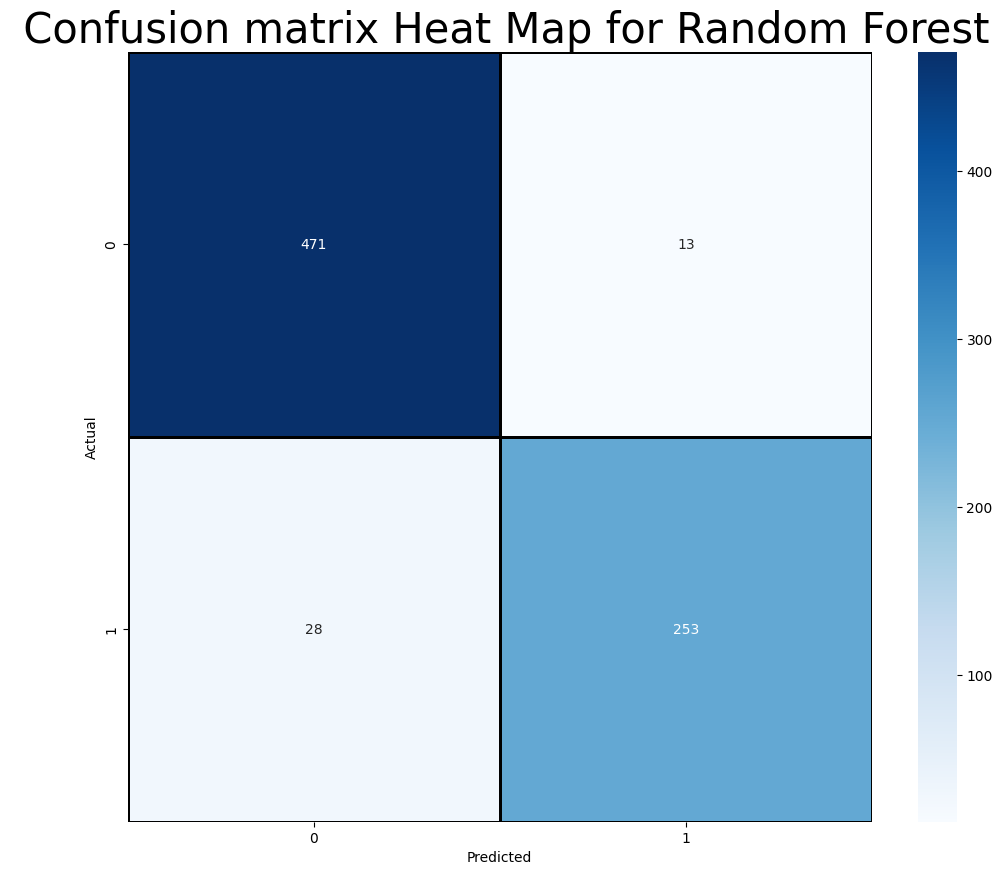

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize = (12,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)
plt.title(" Confusion matrix Heat Map for Random Forest")

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions)
sn.set(font_scale=2.5)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=10bac8d56a41f86383adaacbef4ba29cbb739638f0b9c7d7378c818073ff9d07
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [ ]:
dataframe

,image_name,image_caption,fulltext,label
0,"CXR3676_IM-1829-0001-0001.png,CXR3676_IM-1829-...",Xray Chest PA and Lateral,The cardiomediastinal silhouette appears irreg...,abnormal
1,"CXR3686_IM-1837-0001-0001.png,CXR3686_IM-1837-...","PA and lateral chest, XXXX, XXXX XXXX XXXX",Stable cardiomegaly. Improved aeration in the ...,abnormal
2,CXR3684_IM-1836-1001.png,Chest PA and lateral,2 views of the chest demonstrate sternotomy a...,abnormal
3,"CXR3670_IM-1826-1001.png,CXR3670_IM-1826-2001.png",Xray Chest PA and Lateral,"The heart, pulmonary and mediastinum are with...",abnormal
4,"CXR3672_IM-1828-2001.png,CXR3672_IM-1828-1001.png",PA and lateral chest dated XXXX,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...,...,...
3950,"CXR1882_IM-0571-1002.png,CXR1882_IM-0571-1001.png",Chest radiograph PA and lateral XXXX/XXXX at X...,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,"CXR1842_IM-0545-1001.png,CXR1842_IM-0545-1002.png","PA and lateral chest XXXX, XXXX at XXXX compar...",Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,"CXR1847_IM-0550-2001.png,CXR1847_IM-0550-1001.png","PA lateral chest radiograph, XXXX XXXX hours.",The cardiac and mediastinal silhouettes are un...,abnormal
3953,"CXR1877_IM-0568-1001.png,CXR1877_IM-0568-2001.png","PA and lateral chest XXXX, XXXX at XXXX compa...",Heart size normal. Lungs are clear. are norma...,normal


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import os

# Prepare data for training and testing
X = processed_features
y = labels
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Define vectorizer and classifier
vectorizer = TfidfVectorizer()
text_classifier = LogisticRegression()

# Create and fit the pipeline
pipeline = make_pipeline(vectorizer, text_classifier)
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get class names
class_names = ['abnormal', 'normal']

# Create LIME explainer
explainer = LimeTextExplainer(class_names=class_names)

# Choose a random instance from the test set to explain
idx = 8  # Adjust as needed

# Explain the chosen prediction
exp = explainer.explain_instance(X_test.iloc[idx] if isinstance(X_test, pd.Series) else X_test[idx], pipeline.predict_proba, num_features=6)

# Print results
# print('Document id: %d' % idx)
# print('Text:', X_test.iloc[idx] if isinstance(X_test, pd.Series) else X_test[idx])
print('Probability of being normal =', pipeline.predict_proba([X_test[idx]]).round(3)[0, 1])
print('True class: %s' % y_test.iloc[idx] if isinstance(y_test, pd.Series) else y_test[idx])

# Show explanation with custom CSS for Times New Roman font
exp.show_in_notebook(text=True, labels=(1,), show_predicted_value=False)

# Save explanation plot as PNG
exp.save_to_file('/content/drive/MyDrive/nlp bio informatics/normal_explanation.jpg')

# Display saved file path


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

# Knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test,predictions2,average='micro'))
print('Recall: %.3f' % recall_score(y_test,predictions2,average='micro'))
print('f1: %.3f' % f1_score(y_test,predictions2,average='micro'))


[[130 354]
 [ 55 226]]
              precision    recall  f1-score   support

    abnormal       0.70      0.27      0.39       484
      normal       0.39      0.80      0.52       281

    accuracy                           0.47       765
   macro avg       0.55      0.54      0.46       765
weighted avg       0.59      0.47      0.44       765

0.465359477124183
Precision: 0.465
Recall: 0.465
f1: 0.465


Text(95.24999999999999, 0.5, 'Actual')

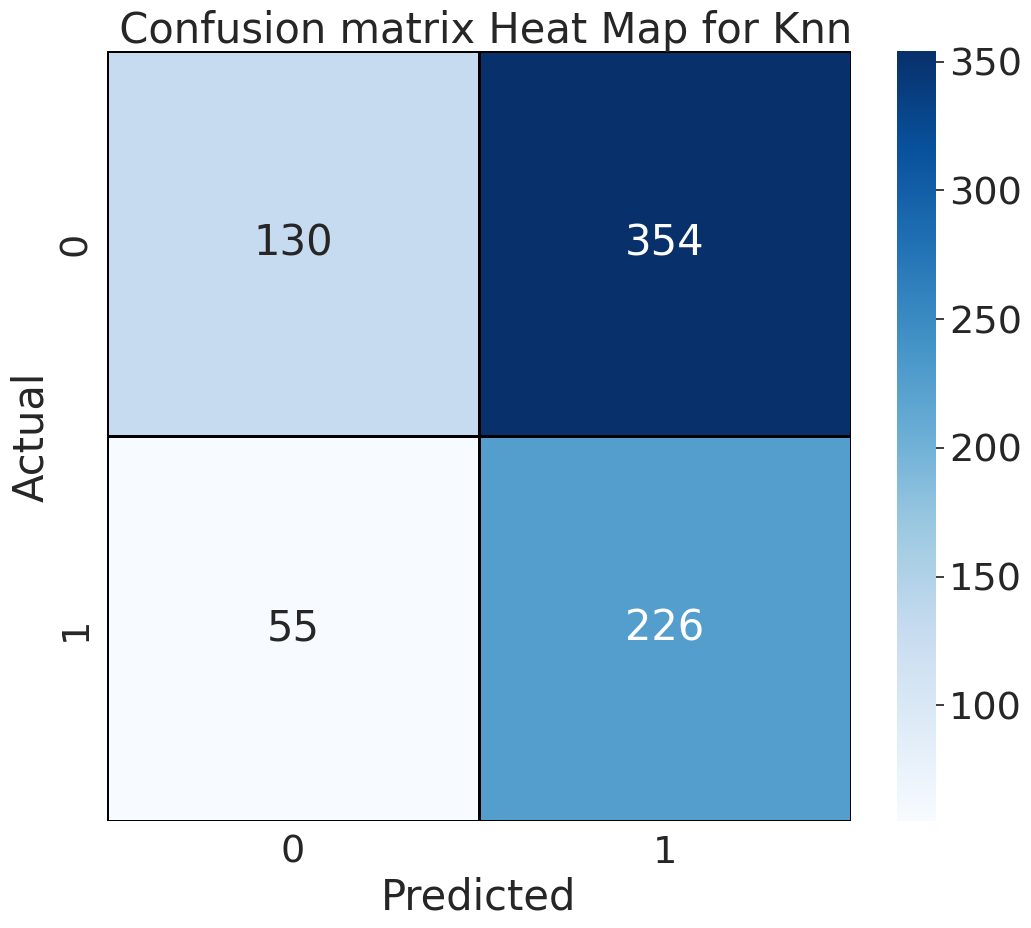

In [ ]:

cm2 = metrics.confusion_matrix(y_test,predictions2)
plt.figure(figsize = (12,10))
sns.heatmap(cm2,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Knn")

plt.ylabel("Actual")
# cm2 = metrics.confusion_matrix(y_test,predictions2)


# LogisticRegression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions3 = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))







from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test,predictions3,average='micro'))
print('Recall: %.3f' % recall_score(y_test,predictions3,average='micro'))
print('f1: %.3f' % f1_score(y_test,predictions3,average='micro'))


[[483   4]
 [ 33 114]]
              precision    recall  f1-score   support

    abnormal       0.94      0.99      0.96       487
      normal       0.97      0.78      0.86       147

    accuracy                           0.94       634
   macro avg       0.95      0.88      0.91       634
weighted avg       0.94      0.94      0.94       634

0.9416403785488959
Precision: 0.942
Recall: 0.942
f1: 0.942


Text(95.24999999999999, 0.5, 'Actual')

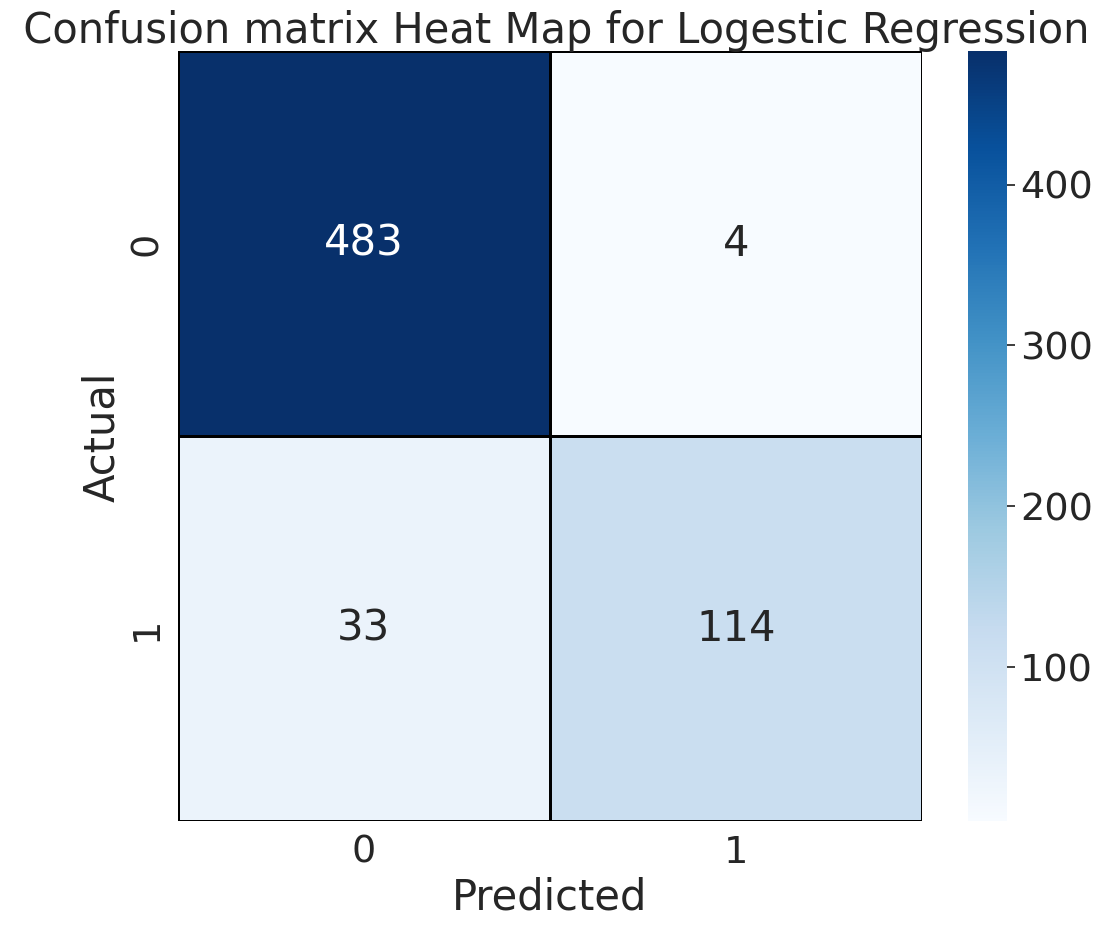

In [ ]:

cm3 = metrics.confusion_matrix(y_test,predictions3)
plt.figure(figsize = (12,10))
sns.heatmap(cm3,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Logestic Regression")

plt.ylabel("Actual")
# cm2 = metrics.confusion_matrix(y_test,predictions2)


# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predicted_naive))
print(classification_report(y_test,predicted_naive))
print(accuracy_score(y_test, predicted_naive))




from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test,predicted_naive,average='macro'))
print('Recall: %.3f' % recall_score(y_test,predicted_naive,average='macro'))
print('f1: %.3f' % f1_score(y_test,predicted_naive,average='macro'))
print('Precision: %.3f' % precision_score(y_test,predicted_naive,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,predicted_naive,average='weighted'))
print('f1: %.3f' % f1_score(y_test,predicted_naive,average='weighted'))

[[480   7]
 [ 42 105]]
              precision    recall  f1-score   support

    abnormal       0.92      0.99      0.95       487
      normal       0.94      0.71      0.81       147

    accuracy                           0.92       634
   macro avg       0.93      0.85      0.88       634
weighted avg       0.92      0.92      0.92       634

0.9227129337539433
Precision: 0.929
Recall: 0.850
f1: 0.881
Precision: 0.924
Recall: 0.923
f1: 0.919


Text(95.24999999999999, 0.5, 'Actual')

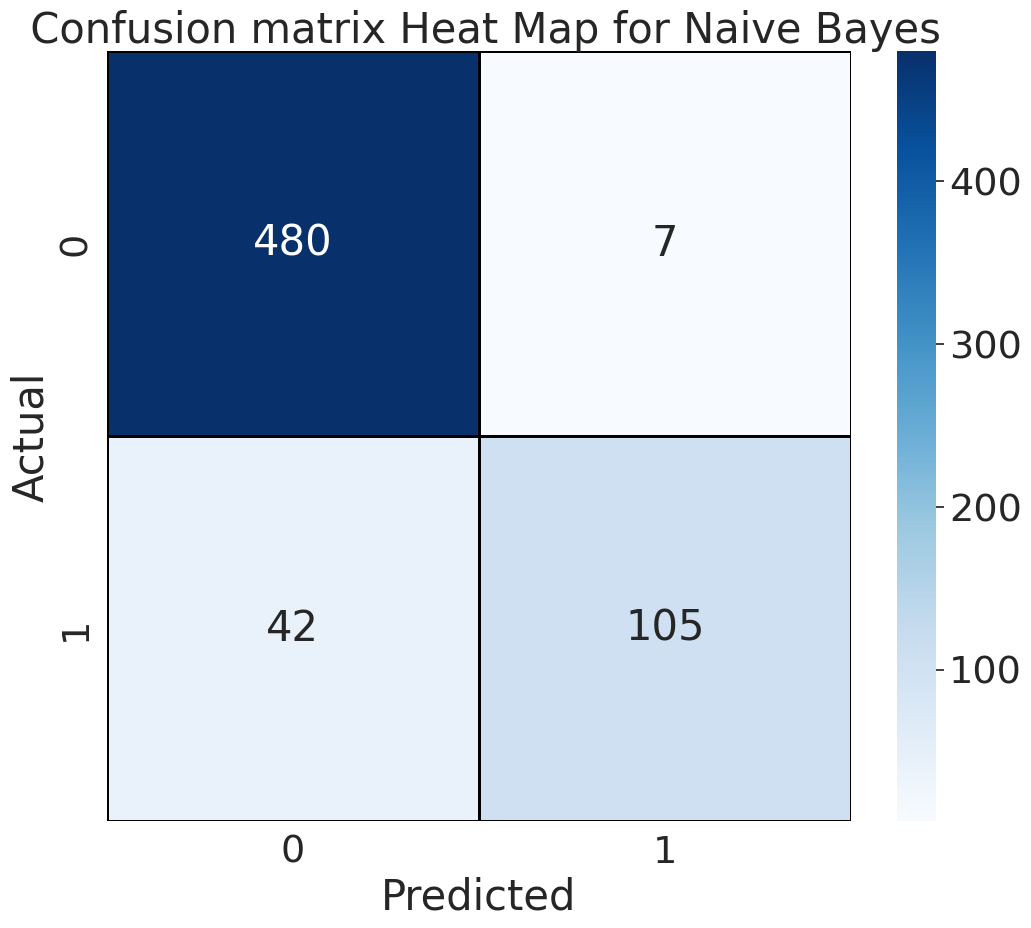

In [ ]:

cm4 = metrics.confusion_matrix(y_test,predicted_naive)
plt.figure(figsize = (12,10))
sns.heatmap(cm4,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Naive Bayes")

plt.ylabel("Actual")
# cm2 = metrics.confusion_matrix(y_test,predictions2)


# DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))





print('Precision: %.3f' % precision_score(y_test,y_pred,average='macro'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='macro'))
print('f1: %.3f' % f1_score(y_test,y_pred,average='macro'))
print('Precision: %.3f' % precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred,average='weighted'))
print('f1: %.3f' % f1_score(y_test,y_pred,average='weighted'))

Text(95.24999999999999, 0.5, 'Actual')

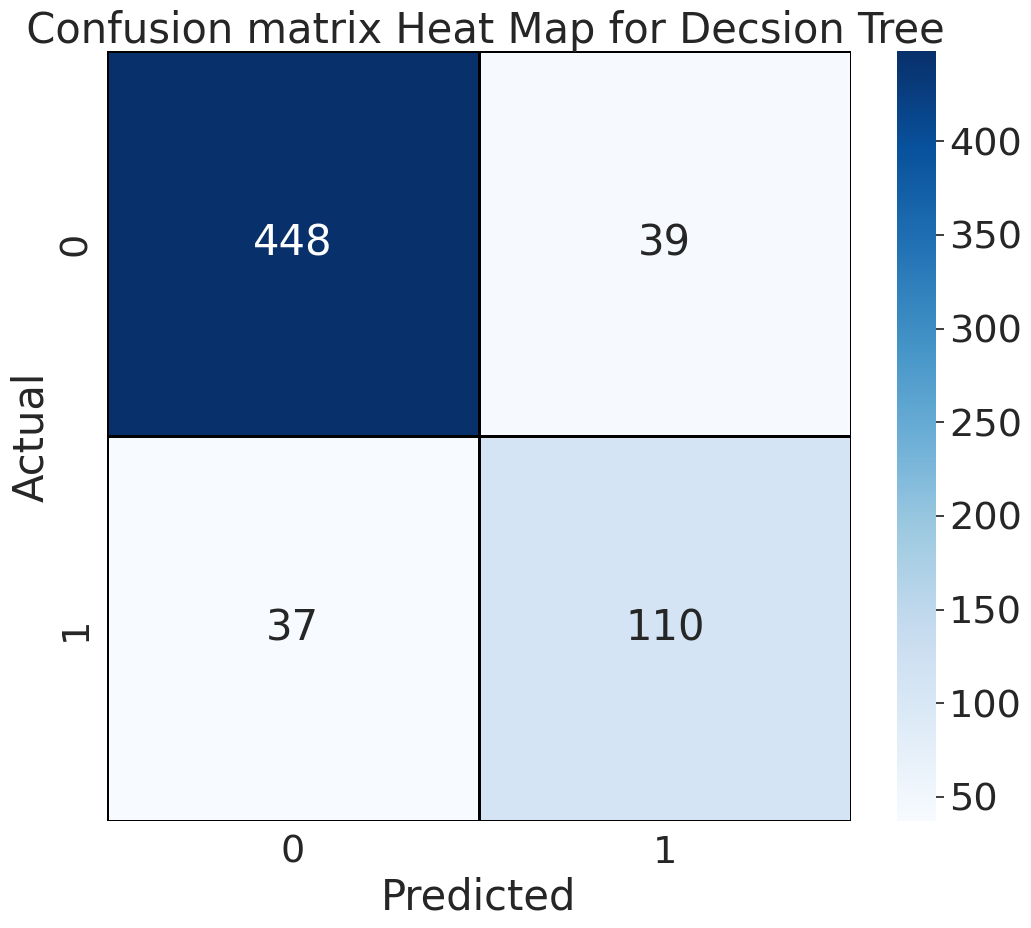

In [ ]:
cm4 = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(cm4,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Decsion Tree")

plt.ylabel("Actual")

# svm classifier

In [ ]:
from sklearn.svm import SVC

model6 = SVC()
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test, y_pred6))














print('Precision: %.3f' % precision_score(y_test,y_pred6,average='macro'))
print('Recall: %.3f' % recall_score(y_test,y_pred6,average='macro'))
print('f1: %.3f' % f1_score(y_test,y_pred6,average='macro'))
print('Precision: %.3f' % precision_score(y_test,y_pred6,average='weighted'))
print('Recall: %.3f' % recall_score(y_test,y_pred6,average='weighted'))
print('f1: %.3f' % f1_score(y_test,y_pred6,average='weighted'))

[[480   7]
 [ 30 117]]
              precision    recall  f1-score   support

    abnormal       0.94      0.99      0.96       487
      normal       0.94      0.80      0.86       147

    accuracy                           0.94       634
   macro avg       0.94      0.89      0.91       634
weighted avg       0.94      0.94      0.94       634

0.9416403785488959
Precision: 0.942
Recall: 0.891
f1: 0.913
Precision: 0.942
Recall: 0.942
f1: 0.940


Text(95.24999999999999, 0.5, 'Actual')

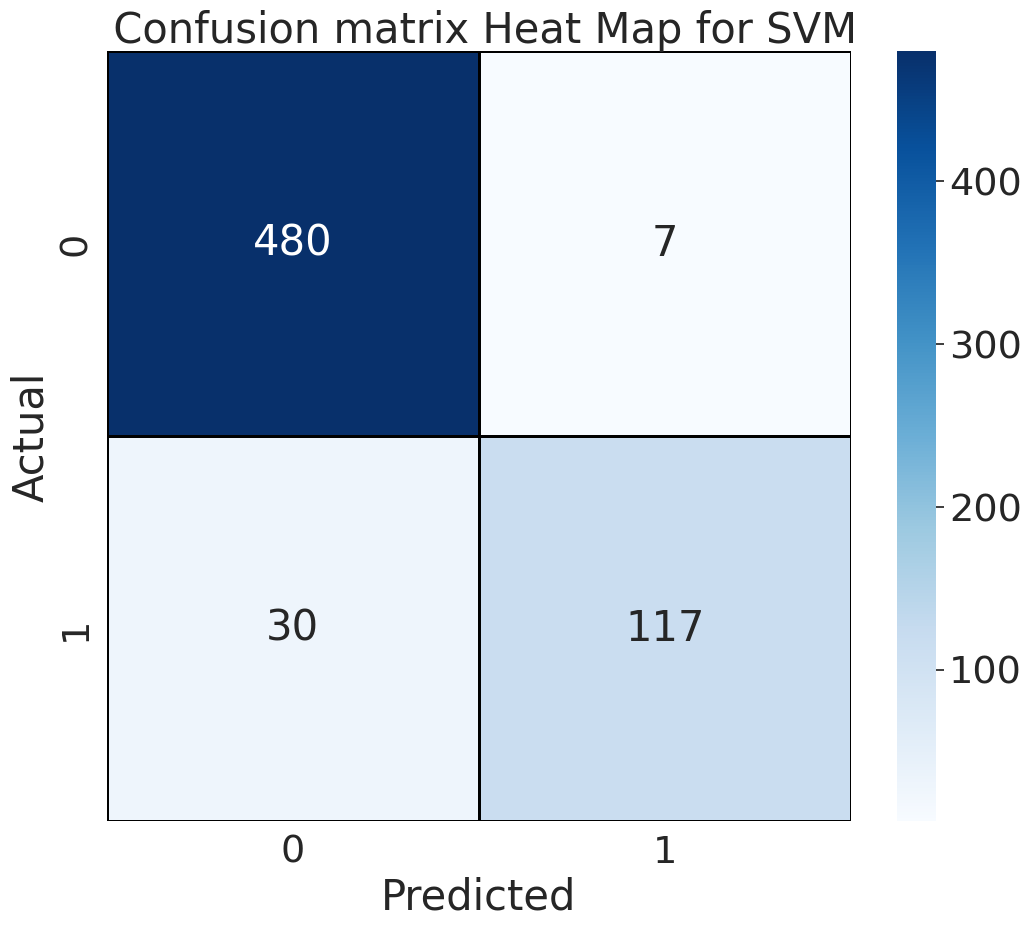

In [ ]:
cm5 = metrics.confusion_matrix(y_test,y_pred6)
plt.figure(figsize = (12,10))
sns.heatmap(cm5,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for SVM")

plt.ylabel("Actual")

# ADA BOOST

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [ ]:
# We'll use 100 weak learners to build a strong learner
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[464  23]
 [ 29 118]]
              precision    recall  f1-score   support

    abnormal       0.94      0.95      0.95       487
      normal       0.84      0.80      0.82       147

    accuracy                           0.92       634
   macro avg       0.89      0.88      0.88       634
weighted avg       0.92      0.92      0.92       634

0.917981072555205


Text(95.24999999999999, 0.5, 'Actual')

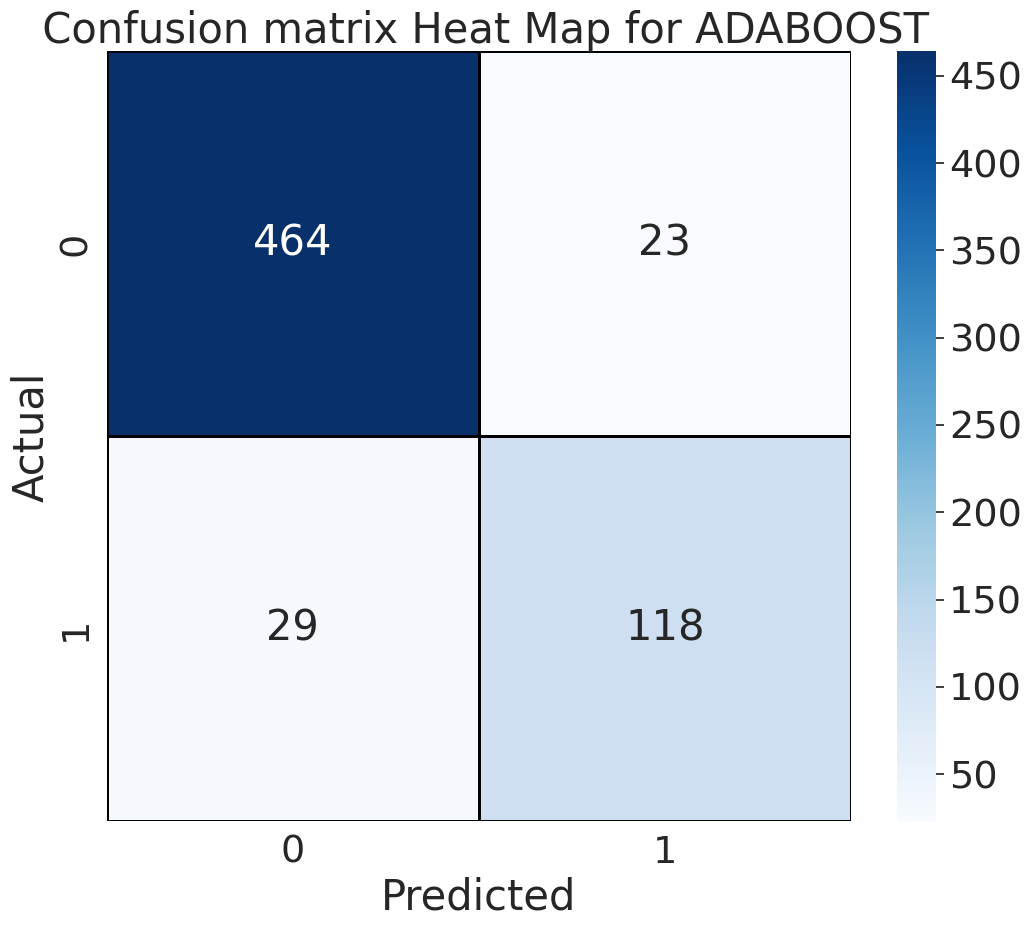

In [ ]:
cm5 = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(cm5,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for ADABOOST")

plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred,average='macro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='macro'))
print('Recall: %.3f' % f1_score(y_test, y_pred,average='micro'))
print('Precision: %.3f' % precision_score(y_test, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='weighted'))
print('Recall: %.3f' % f1_score(y_test, y_pred,average='weighted'))


Precision: 0.889
Recall: 0.878
Recall: 0.918
Precision: 0.917
Recall: 0.918
Recall: 0.917


In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred,average='macro'))

Recall: 0.878


In [ ]:
print('Recall: %.3f' % f1_score(y_test, y_pred,average='micro'))

Recall: 0.918


# mlp

In [ ]:
# Import MLPClassifer
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,y_train)


Iteration 1, loss = 0.47310385
Iteration 2, loss = 0.35555788
Iteration 3, loss = 0.26037631
Iteration 4, loss = 0.18507467
Iteration 5, loss = 0.12774506
Iteration 6, loss = 0.08646017
Iteration 7, loss = 0.06153794
Iteration 8, loss = 0.04913999
Iteration 9, loss = 0.04167125
Iteration 10, loss = 0.03509805
Iteration 11, loss = 0.03360208
Iteration 12, loss = 0.02887805
Iteration 13, loss = 0.02635518
Iteration 14, loss = 0.02624159
Iteration 15, loss = 0.02537728
Iteration 16, loss = 0.02434262
Iteration 17, loss = 0.02526368
Iteration 18, loss = 0.02168868
Iteration 19, loss = 0.02049618
Iteration 20, loss = 0.01921683
Iteration 21, loss = 0.01941011
Iteration 22, loss = 0.01775407
Iteration 23, loss = 0.01768334
Iteration 24, loss = 0.01824511
Iteration 25, loss = 0.01625831
Iteration 26, loss = 0.01644272
Iteration 27, loss = 0.01579307
Iteration 28, loss = 0.01684843
Iteration 29, loss = 0.01688461
Iteration 30, loss = 0.01654737
Iteration 31, loss = 0.01470064
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.9337539432176656

In [ ]:
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print(accuracy_score(y_test, ypred))

[[467  20]
 [ 22 125]]
              precision    recall  f1-score   support

    abnormal       0.96      0.96      0.96       487
      normal       0.86      0.85      0.86       147

    accuracy                           0.93       634
   macro avg       0.91      0.90      0.91       634
weighted avg       0.93      0.93      0.93       634

0.9337539432176656


Text(95.24999999999999, 0.5, 'Actual')

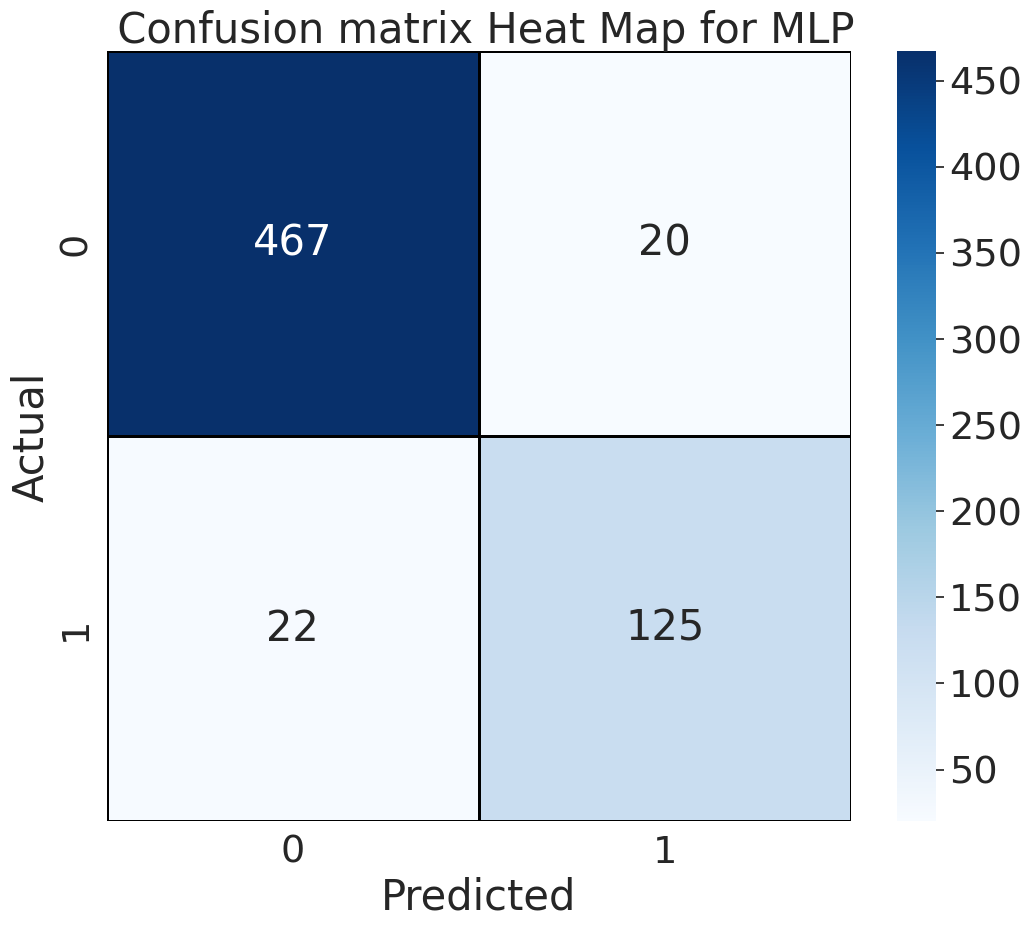

In [ ]:
cm5 = metrics.confusion_matrix(y_test,ypred)
plt.figure(figsize = (12,10))
sns.heatmap(cm5,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for MLP")

plt.ylabel("Actual")

## Ensamble techniques

In [ ]:
#Machine Learning Algorithms
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
clf2 = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000, random_state=42)
clf3 = XGBClassifier(max_depth=3, n_estimators=100, random_state=42)
# create a voting classifier with hard voting
voting_classifier_hard = VotingClassifier(
    estimators = [('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                                              ('mlp', clf2), ('xgb', clf3),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True)),
                                              ('gnb', GaussianNB())], voting='hard')

# create a voting classifier with soft voting
voting_classifier_soft = VotingClassifier(
    estimators = [('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                                              ('mlp', clf2), ('xgb', clf3),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('svm',svm.SVC(kernel='linear',probability=True)),
                                              ('gnb', GaussianNB())], voting='soft')

# make predictions with the hard voting model
voting_classifier_hard.fit(X_train, y_train)
y_pred_vch = voting_classifier_hard.predict(X_test)

# make predictions with the soft voting model
voting_classifier_soft.fit(X_train, y_train)
y_pred_vcs = voting_classifier_soft.predict(X_test)

# evaluate both models with the f-1 score
f1_vch = f1_score(y_test, y_pred_vch, average='macro')
f1_vcs = f1_score(y_test, y_pred_vcs, average='macro')

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the hard voting classifier: 0.9217
F1-score of the soft voting classifier: 0.9327


In [ ]:
cm_soft = confusion_matrix(y_test, y_pred_vcs)
cm_hard = confusion_matrix(y_test, y_pred_vch)

print("Confusion Matrix for Soft Voting Classifier:\n", cm_soft)
print("Confusion Matrix for Hard Voting Classifier:\n", cm_hard)

Confusion Matrix for Soft Voting Classifier:
 [[482   5]
 [ 24 123]]
Confusion Matrix for Hard Voting Classifier:
 [[484   3]
 [ 30 117]]


In [ ]:
cr_soft = classification_report(y_test, y_pred_vcs)
cr_hard = classification_report(y_test, y_pred_vch)

print("classifciation report for Soft Voting Classifier:\n", cr_soft)
print("Classification repeort for Hard Voting Classifier:\n", cr_hard)

classifciation report for Soft Voting Classifier:
               precision    recall  f1-score   support

    abnormal       0.95      0.99      0.97       487
      normal       0.96      0.84      0.89       147

    accuracy                           0.95       634
   macro avg       0.96      0.91      0.93       634
weighted avg       0.95      0.95      0.95       634

Classification repeort for Hard Voting Classifier:
               precision    recall  f1-score   support

    abnormal       0.94      0.99      0.97       487
      normal       0.97      0.80      0.88       147

    accuracy                           0.95       634
   macro avg       0.96      0.89      0.92       634
weighted avg       0.95      0.95      0.95       634



Text(95.24999999999999, 0.5, 'Actual')

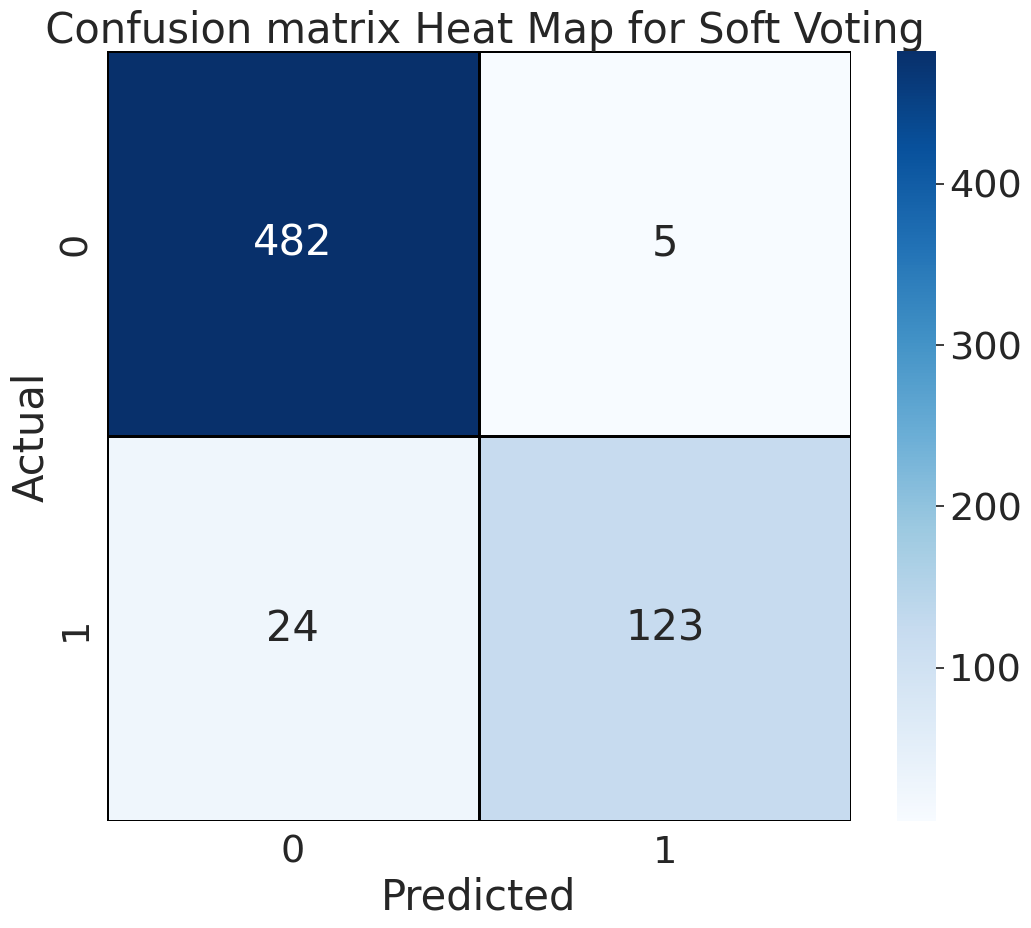

In [ ]:
cm5 = cm_soft
plt.figure(figsize = (12,10))
sns.heatmap(cm5,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Soft Voting")

plt.ylabel("Actual")

Text(95.24999999999999, 0.5, 'Actual')

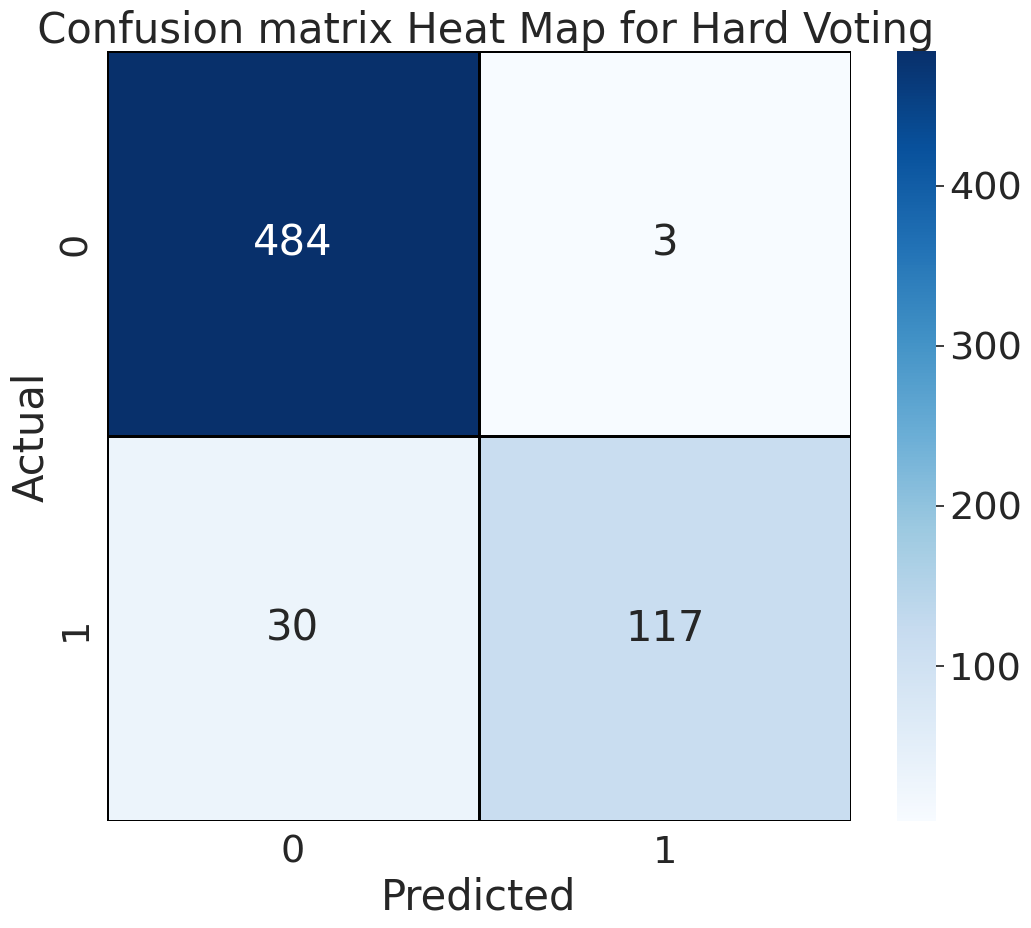

In [ ]:
cm5 = cm_hard
plt.figure(figsize = (12,10))
sns.heatmap(cm5,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
plt.title(" Confusion matrix Heat Map for Hard Voting")

plt.ylabel("Actual")